# WSL2 Tutorial: How to Create the Perfect Linux Data Science Environment on Windows With WSL2
## Everything included: terminal, docker, anaconda, git, Jupyter Lab, and so on...

### 1. Uninstall existing installation

Follow Step 1 of the following guide: https://pureinfotech.com/uninstall-wsl2-windows-10/

### 2. Install Docker Desktop

https://docs.docker.com/desktop/install/windows-install/

### 3. Check prerequisites

Settings > System > About:

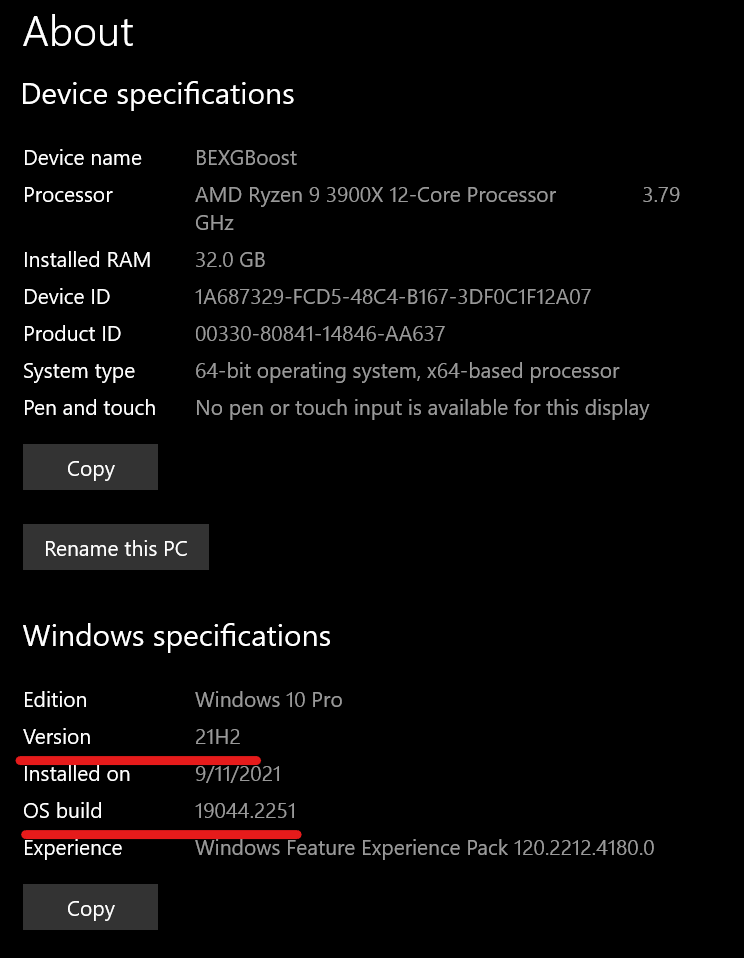

### 4. Install WSL2

```
wsl --install -d Ubuntu
```

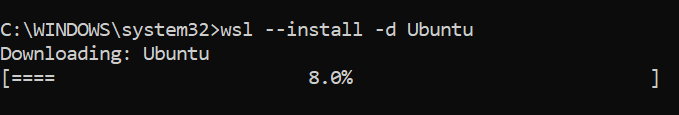

### 5. Setup a username and account

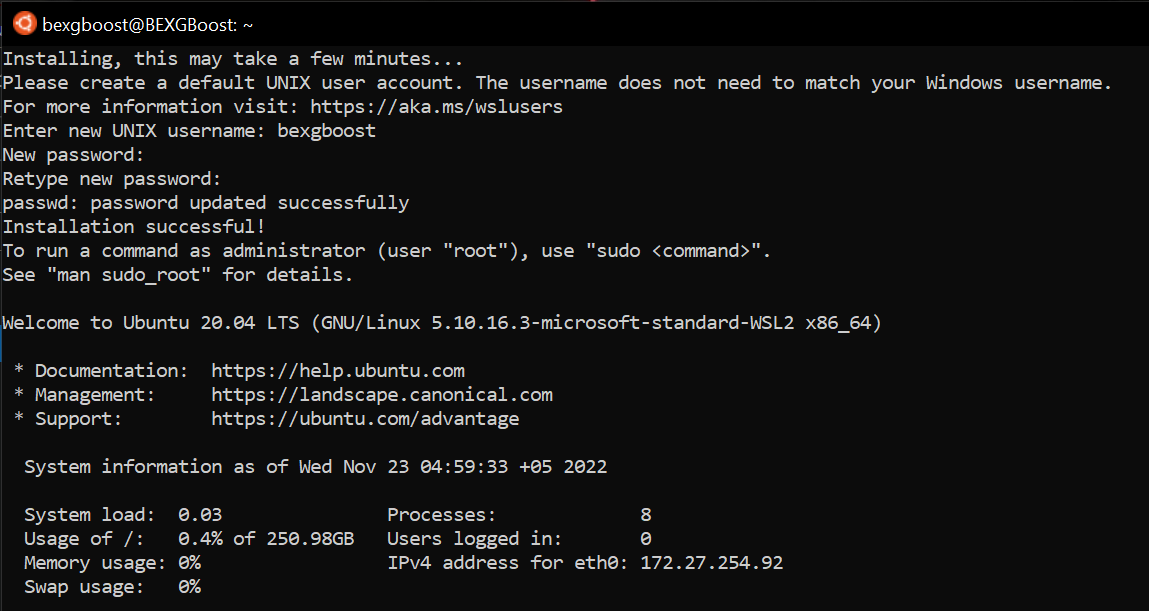

### 6. How to update and upgrade packages on WSL2

`sudo apt update && sudo apt upgrade`

`sudo` is the same as "Run as administrator" on Windows. Asks for password.

### 7. Understanding the file systems in WSL2

Use explorer.exe .

### 8. How to install Visual Studio Code for WSL2

Install VSCode regularly on Windows (you must have it already). Then, install [Remote Extension Development Pack](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.vscode-remote-extensionpack). Then, call `sudo apt-get update`.

Then, `code .` is available.

### 9. How to install and set up Git for WSL2

1. Check the version first
2. If not available, run `sudo apt-get install git`
3. Run `git --version` again.

### 10. Install Docker for WSL2

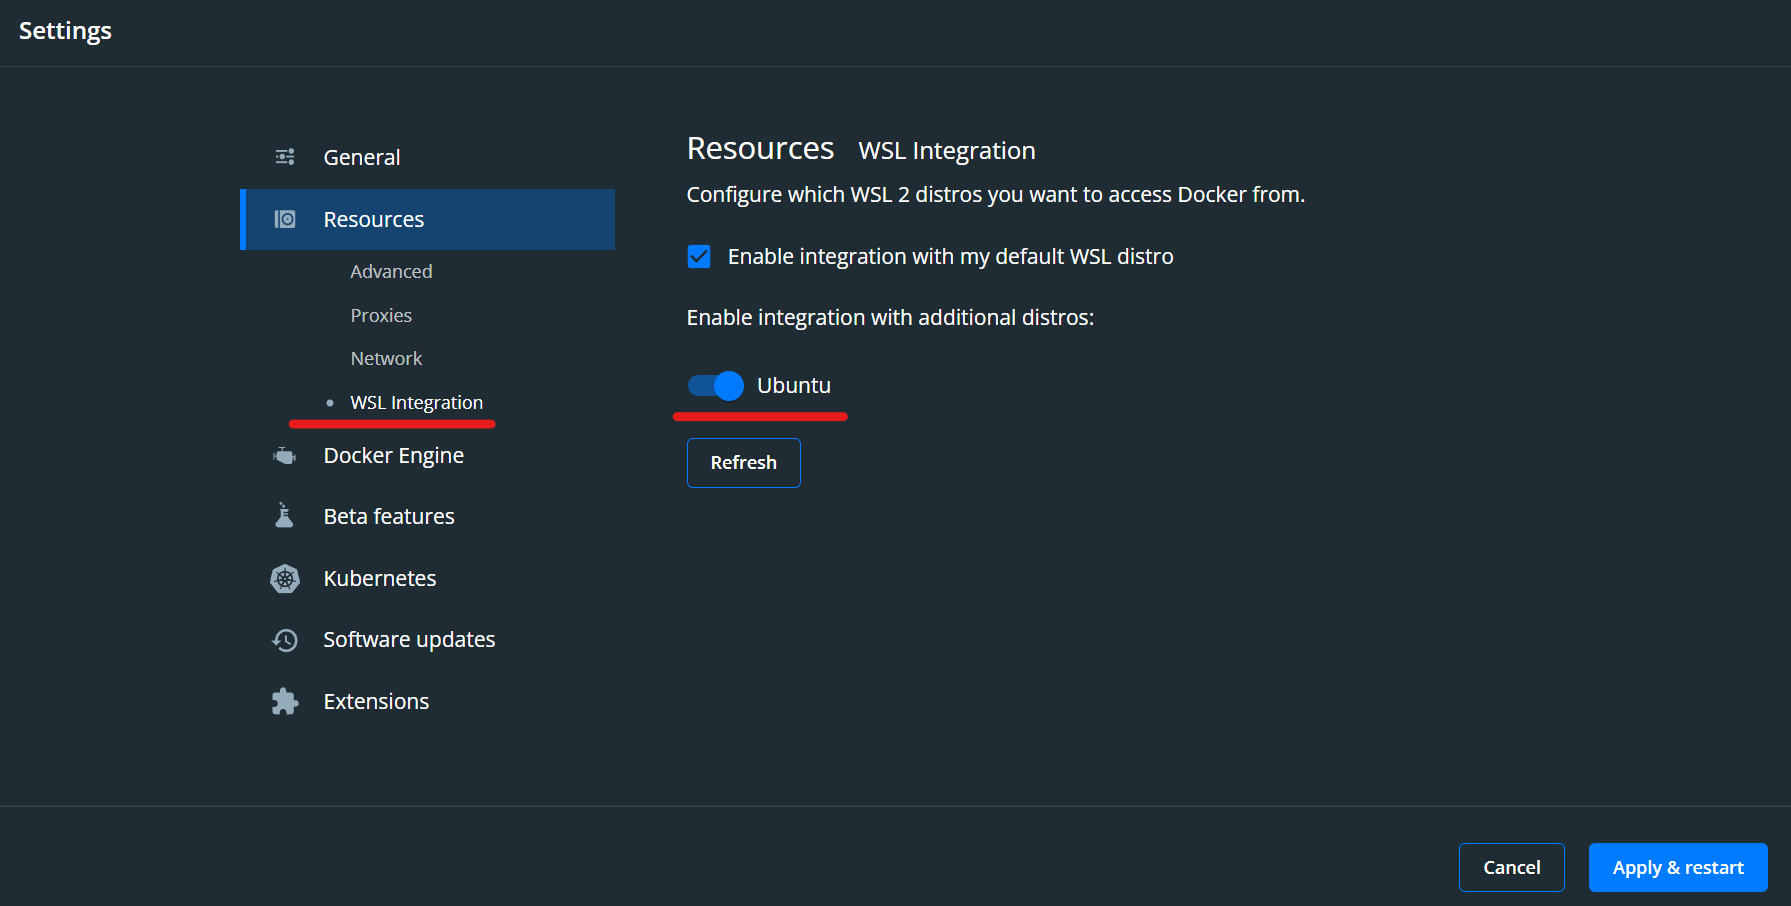

### 11. How to install Anaconda on WSL2

1. Go to https://www.anaconda.com/products/distribution
2. Find the distribution:
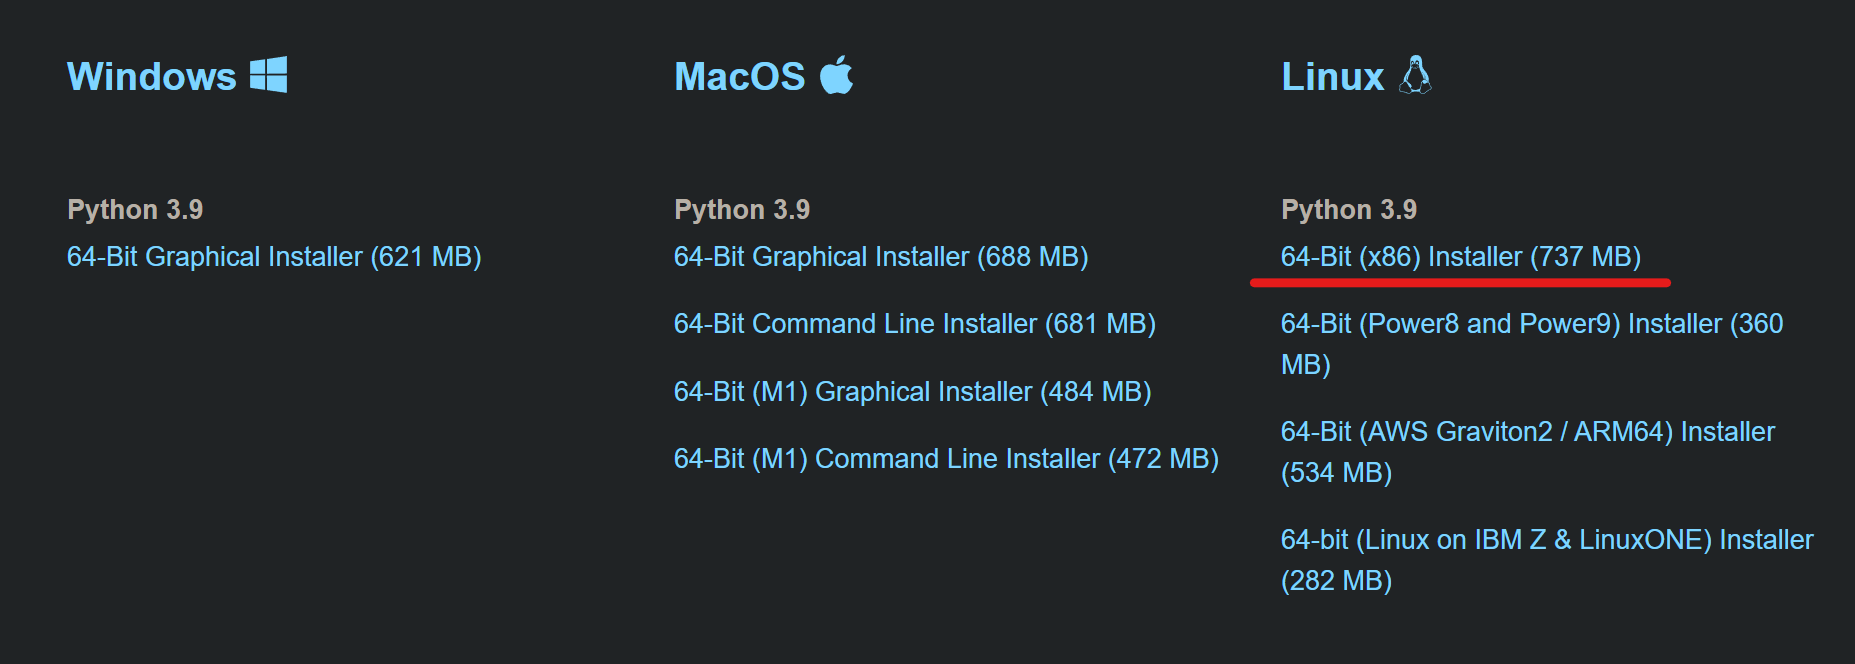

3. Copy the download link and download the installation file:

```
wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
```

4. Install the file
```
bash Anaconda3-2022.10-Linux-x86_64.sh
```

First, press ENTER multiple times. Then, it asks two yes/no questions. Answer yes both times.

5. Check conda version and Python installation.
Close/open the current Ubuntu tab.

```
conda --version
which python
```

### 12. How to install Jupyter Lab on WSL2

1. Install in the base env
```
conda install -c conda-forge jupyterlab
```

2. Run without browser:

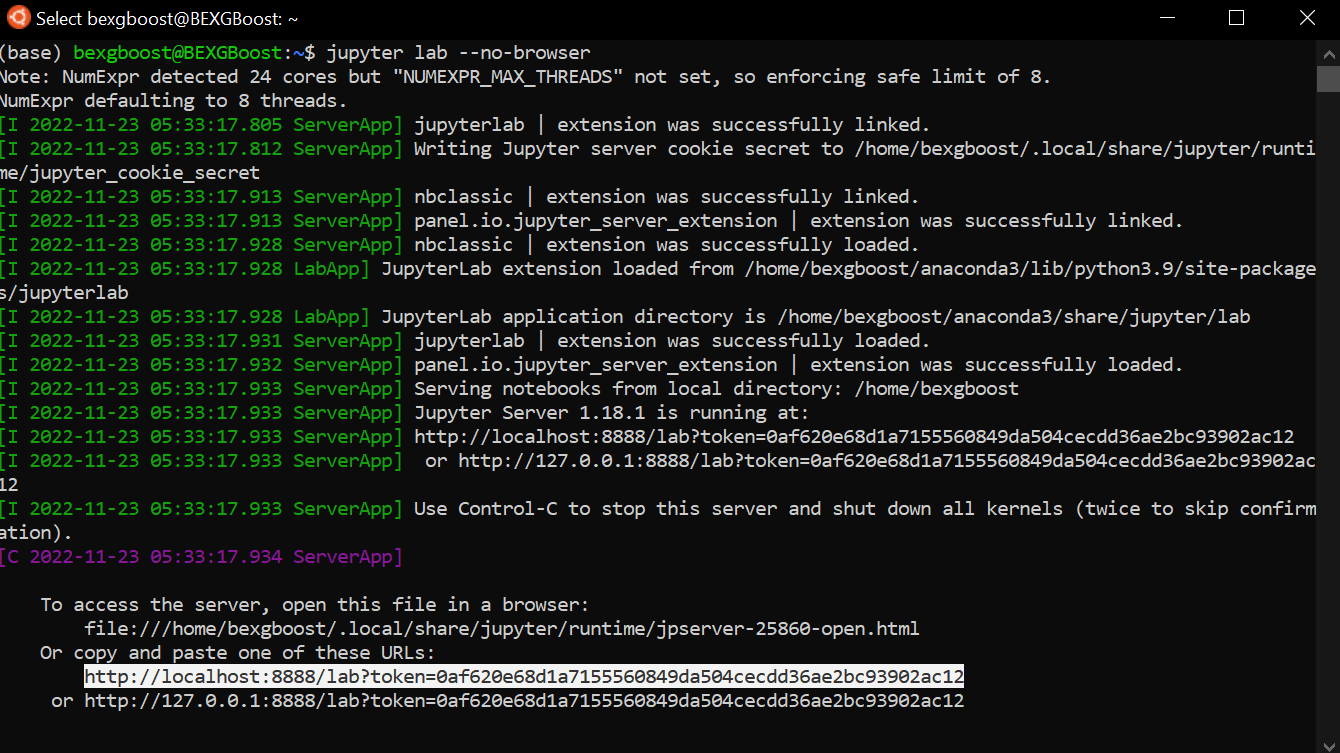

3. Create and add conda environments to Jupyter Lab on WSL2.

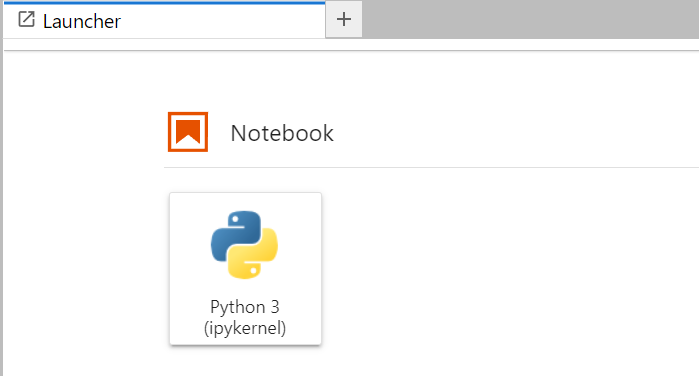

```
conda create -n new_env -y
pip install ipykernel
ipython kernel install --user --name=new_env
```

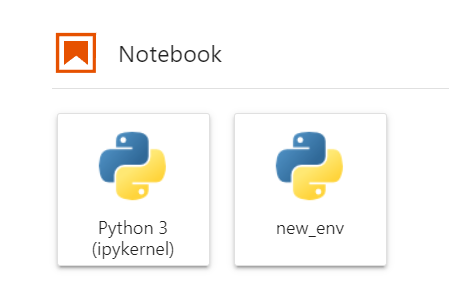

### 13. How to install spellchecker and code formatter for Jupyter Lab (optional)

```
pip install jupyterlab-spellchecker
pip install jupyterlab-code-formatter
pip install black isort
```

![](images/extensions.gif)

Check the settings > Advanced Settings Editor, Open JSON settings button on the right

### 14. How to format the WSL2 terminal (optional)

Gist for formatting the terminal: https://gist.github.com/65dc419af0efa723fc78e269a286ec52.git

### 15. How to add WSL2 Linux terminal as a PyCharm builtin terminal